# ODEs for modelling populations

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Models of population growth

Let's say you're interested in modeling population growth. One popular model is that the growth is proportional to the size of the population. This is a reasonable assumption for animals/baceteria/viruses under ideal conditions. There are two variables to begin with:

* $ t $, the time point (independent variable)
* $P $, the population size (dependent variable)

We want to know the change in $P$ over $t$, so we model this as:
\begin{align}
    \frac{dP}{dt} = kP \label{eq1}
\end{align}

where $k$ is the proportionality constant.

What are the consequences of this model? We may assume that the population cannot be $0$, so $P(t) > 0$ for all $t$. If $k > 0 $, then by equation (\ref{eq1}) we have $P'(t) > 0$ for all $t$. In other words, the population is always increasing, and as the population $P$ grows larger, the derivative $\frac{dP}{dt}$ grows larger; the growth rate increases with the population size.

This function is a constant multiple of itself. The unique family to this solution is $P(t) = Ce^{kt}$, for varying $C$. Then:

$$ P'(t) = C(ke^{kt}) = k(Ce^{kt}) = kP(t) $$

Since populations can only be positive, we only care about $C > 0$. Generally we also only care about $t \ge 0$ as well.

Plugging in the value $t=0$ we see that 

$$P(0) = Ce^{k(0)} = C$$

Meaning that our initial population is $C$.

The summary of variables so far is:
* $t$ (time)
* $P(t)$ (population at time $t$)
* $k$, some proportionality constant
* $C$, the starting population

This model is not fully realistic as even under ideal conditions populations will hit a **carrying capacity ($K$)** related to resources, habitats, space, etc. Usually what happens is the population levels off as it approaches $K$, and if the population exceeds its capacity, it shrinks. Thus we formulate two assumptions:

* $\frac{dP}{dt} \approx kP$ when $P$ is small (growth starts out proportional to P)
* $\frac{dP}{dt} < 0$ if $P > K$

We can summarize these in one expression:
\begin{align}
    \frac{dP}{dt} = kP(1 - \frac{P}{K}) \label{eq2}
\end{align}

This is called the **logistic differential equation**. Notice that:

* if $P$ is small relative to $K$, then $\frac{P}{K} \approx 0$ and $\frac{dP}{dt} \approx kP$
* there are two solutions to equation (\ref{eq2}): $P(t) = 0$ and $P(t) = K$. When our population is $0$ or our population is at capacity $K$, the growth rate $\frac{dP}{dt}=0$
 * These are **equilibrium solutions**

When is the right side of equation (\ref{eq2}) negative? When is it positive? Consider the implications of such a model.

# Solving differential equations

Most differential equations don't have an explicit solution, meaning we must use graphical and numerical approaches.

In [ ]:
#see $(\ref{eq1})$

# References

* Stewart, James. _Calculus: Early Transcendentals Single Variable_, 5th edition, Chapter 9.

# Sandbox

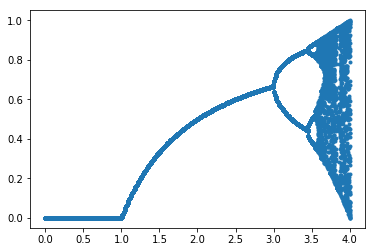

In [2]:
# https://stackoverflow.com/questions/14739555/code-for-logistic-equation

import numpy as np
import matplotlib.pyplot as plt
import pylab
import numpy

def f(x, r):
    """Discrete logistic equation with parameter r"""
    return r*x*(1-x)

if __name__ == '__main__':
    # initial condition for x
    ys = []
    rs = numpy.linspace(0, 4, 400)

    # Loop through `rs`. `r` is assigned the values in `rs` one at a time. 
    for r in rs:
        x = 0.1
        # Repeat this loop 500 times. 
        # i is just a dummy variable since it is not used inside the for-loop.
        for i in range(500):
            # Evaluate f at (x, r). The return value is assigned to x.
            # x is then fed back into f(x, r). 
            # This makes x jump around 500 times according to the logistic equation.
            # r remains fixed.
            x = f(x, r)

        # Do this 50 times
        for i in range(50):
            # Again make the x jump around according to the logistic equation
            x = f(x, r)
            # Save the point (r, x) in the list ys
            ys.append([r, x])

    # ys is a list of lists.
    # You can also think of ys as a list of [r, x] point.
    # This converts the list of lists into a 2D numpy array.
    ys = numpy.array(ys)

    # ys[:,0] is a 1D array of r values
    # ys[:, 1] is a 1D array of x values
    # This draws a scatter plot of (r, x) points.
    pylab.plot(ys[:,0], ys[:,1], '.')
    pylab.show()

In [4]:
# http://astro.pas.rochester.edu/~aquillen/phy411/pylab/logistic.py
# plot periodic orbits and iterations for the logistic map  
# 
import numpy as np
import matplotlib.pyplot as plt

# logistic map is f(x) = mu*x*(1-x)  with mu in (0,4)
def logistic(x,mu):
    y = mu*x*(1.0-x)
    return y 

# fill an array with iteration n1 to n2 of the logistic map starting with x0
# and with parameter mu
def fillit(n1,n2,x0,mu):
    x = x0  # initial x value
    z = np.linspace(0.0,1.0,n2-n1)  # create an array
    for i in range(0,n1):   # do n1 iterations
        x = logistic(x,mu)
        
    for i in range(0,n2-n1):   # fill n2-n1 iterations
        x = logistic(x,mu)
        z[i] = x

    return z  # returning the array


# plot the iterated logistic map for nmu number of mu values
def mkplot(mu_min,nmu):  # nmu is number of mu values to use, mu_min range 
    mu_max = 4.0  # maximum mu value
    muarr = np.linspace(mu_min,mu_max,nmu)  
    n1=100  #specify iteration range
    n2=200  
    x0=0.5  # initial x
    for i in range(0,nmu):
        mu = muarr[i]
        y=fillit(n1,n2,x0,mu)  # get the array of iterations
        x=y*0.0 + mu   # dummy x value is all mu 
        plt.plot(x,y,'ko',markersize=1)   # k=black, plot small points



plt.figure()
plt.xlabel(r'$\mu$',fontsize=20)
mu_min=2.9
plt.axis([mu_min, 4.0, 0, 1.0])
# this makes the plot!
mkplot(mu_min,1000)